In [1]:
import pandas as pd
import matplotlib.pyplot as plt

result_path = f"../result.csv"
df = pd.read_csv(result_path)

In [2]:
def method_vs_data(df):
    prefixes = ["Flan", "GPT-2", "T5"]
    return_df = []
    for prefix in prefixes:
        pre_df = df[df['Model'].str.startswith(prefix)]
        dataset_groups = pre_df.groupby("Data")
        dataset_averages = dataset_groups.mean()
        dataset_averages = dataset_averages.assign(Model=f"{prefix} Models")
        dataset_averages = dataset_averages.reindex(columns=["Model","Accuracy_ZS", "Accuracy_CA", "Accuracy_PE", "Accuracy_FULL"])
        return_df.append(dataset_averages)
    # concatenate all the dataframes
    return return_df

In [3]:
flan_df, gpt2_df, t5_df  = method_vs_data(df)

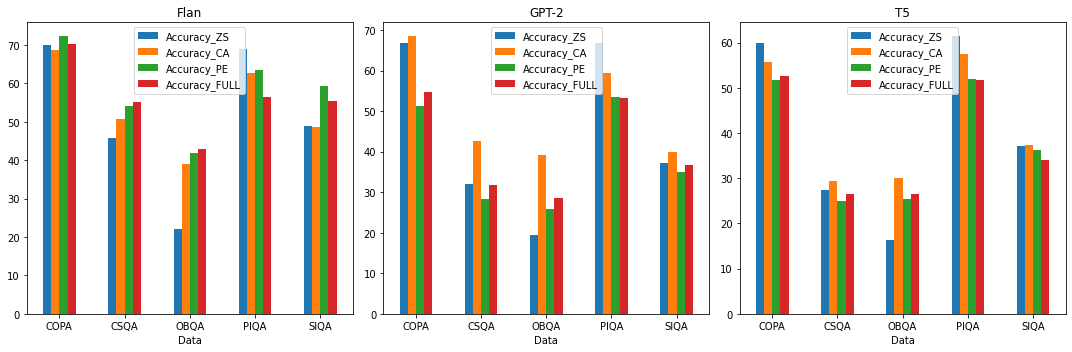

In [11]:
# Plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
flan_df.plot.bar(ax=ax[0], rot=0, title="Flan")
gpt2_df.plot.bar(ax=ax[1], rot=0, title="GPT-2")
t5_df.plot.bar(ax=ax[2], rot=0, title="T5")
plt.tight_layout()
plt.savefig("output.png", dpi=300)
plt.show()